Custer Analysis in Scipy
In the notebook we explore the measures of hierarchical and k-means clustering with 'scipy' ('sklearn' for data standerdizing is also applied)

Source:
	Hierarchy cluster(scipy):
http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
	Kmeans(scipy):
http://docs.scipy.org/doc/scipy/reference/cluster.vq.html#module-scipy.cluster.vq
	Processing data(sklearn):
http://scikit-learn.org/stable/modules/preprocessing.html


In [30]:
import pandas as pd
import numpy as np

In [3]:
mss_df = pd.read_pickle('/Users/Dannyhsiao/Desktop/MA755/MillionSongSubset/data/mss_df.pkl')

In [4]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [57]:
mss_df.head()

,duration,key,loudness,mode,tempo,time_signature,artist_familiarity,artist_hotttnesss,song_hotttnesss,genre,title,artist_location,releaseartist_longitude,artist_latitude
0,218.93179,1,-11.197,0,92.198,4,0.581794,0.401998,0.602120,b'',"b""I Didn't Mean To""",b'California - LA',NaN,NaN
1,148.03546,6,-9.843,0,121.274,4,0.630630,0.417500,NaN,b'',b'Soul Deep',"b'Memphis, TN'",NaN,35.14968
2,177.47546,8,-9.689,1,100.070,1,0.487357,0.343428,NaN,b'',b'Amor De Cabaret',b'',NaN,NaN
3,233.40363,0,-9.013,1,119.293,4,0.630382,0.454231,NaN,b'',b'Something Girls',"b'London, England'",NaN,NaN
4,209.60608,2,-4.501,1,129.738,4,0.651046,0.401724,0.604501,b'',b'Face the Ashes',b'',NaN,NaN


In [35]:
# drop chategorical avriables
mss_df_nu=mss_df.drop(['key','mode','time_signature','genre','title','artist_location','artist_latitude','releaseartist_longitude'],axis=1)

In [36]:
# import preprocessing to standardize the numerical variables
from sklearn.datasets import load_iris
from sklearn import preprocessing

In [39]:
# Nan values cannot be processed by preprocessing. Check Nan values
mss_df_nu.isnull().sum()

duration                 0
loudness                 0
tempo                    0
artist_familiarity       4
artist_hotttnesss        0
song_hotttnesss       4352
dtype: int64

In [40]:
# replace Nan values with the corresponding mean
mss_df_nunew=mss_df_nu.fillna(mss_df_nu.mean())

In [41]:
mss_df_nunew.isnull().sum()

duration              0
loudness              0
tempo                 0
artist_familiarity    0
artist_hotttnesss     0
song_hotttnesss       0
dtype: int64

In [26]:
# standardizing the dataset
sd_mss_df_nu = preprocessing.scale(mss_df_nunew)

In [34]:
sd_mss_df_nu

array([[-0.17152, -0.13174, -0.87309,  0.10204,  0.11449,  1.39575],
       [-0.7927 ,  0.11902, -0.04666,  0.40703,  0.22241,  0.     ],
       [-0.53475,  0.14754, -0.64934, -0.48775, -0.29326,  0.     ],
       ..., 
       [-0.39239, -0.29657, -0.13622, -0.82405, -0.6659 ,  0.     ],
       [ 0.54602, -0.38676,  0.41917, -1.44265, -1.17463, -1.84534],
       [-0.25208,  0.95595,  0.78617,  0.27308,  0.86112,  2.35492]])

In [46]:
# scipy.cluster.hierarchy require input data in DataFrame format
sd_mss_cluster=pd.DataFrame(sd_mss_df_nu)

In [52]:
sd_mss_cluster.head()

,0,1,2,3,4,5
0,-0.171519,-0.131740,-0.873085,0.102036,0.114490,1.395750e+00
1,-0.792698,0.119023,-0.046655,0.407031,0.222413,3.585663e-15
2,-0.534751,0.147544,-0.649338,-0.487749,-0.293259,3.585663e-15
3,-0.044719,0.272741,-0.102961,0.405484,0.478132,3.585663e-15
4,-0.253229,1.108371,0.193918,0.534532,0.112583,1.408565e+00


In [42]:
# scipy package for hierarchical clustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

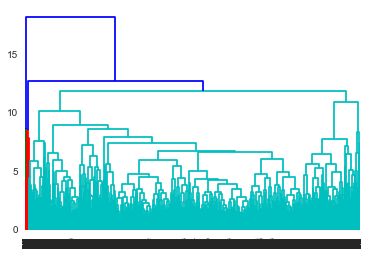

In [51]:
# pdist: Pairwise distances between observations in n-dimensional space.

distanceMatrix = pdist(sd_mss_cluster) #'euclidean' is default measure

# linkage: define measure between clusters
# complete is the farest distance between clusters
dend = dendrogram(linkage(distanceMatrix, method='complete'))

In [120]:
# k-means in scipy
from scipy.cluster.vq import kmeans,vq,kmeans2

# Generate 4 centroids and accordingly cluster lables
centroids,label=kmeans2(sd_mss_cluster,4)
label

array([0, 2, 3, ..., 3, 3, 0], dtype=int32)

In [121]:
# join new label to the dataset
mss_df_nu['kmeans_4']= label

In [83]:
mss_df_nu.head()

,duration,loudness,tempo,artist_familiarity,artist_hotttnesss,song_hotttnesss,kmeans_4
0,218.93179,-11.197,92.198,0.581794,0.401998,0.602120,3
1,148.03546,-9.843,121.274,0.630630,0.417500,NaN,3
2,177.47546,-9.689,100.070,0.487357,0.343428,NaN,3
3,233.40363,-9.013,119.293,0.630382,0.454231,NaN,3
4,209.60608,-4.501,129.738,0.651046,0.401724,0.604501,1


In [85]:
# group by k-mean label
km4groupd=mss_df_nu.groupby(mss_df_nu['kmeans_4'])

In [86]:
km4groupd.size()

kmeans_4
0    2558
1    2256
2    1797
3    3389
dtype: int64

In [87]:
km4groupd.describe()

artist_familiarity  artist_hotttnesss     duration  \
kmeans_4                                                             
0        count         2554.000000        2558.000000  2558.000000   
         mean             0.433150           0.267367   248.781581   
         std              0.129896           0.133115   127.672174   
         min              0.000000           0.000000     7.130980   
         25%              0.374029           0.236467   178.278732   
         50%              0.450213           0.311945   226.664040   
         75%              0.516013           0.353156   285.015058   
         max              0.791466           0.557408  1815.222400   
1        count         2256.000000        2256.000000  2256.000000   
         mean             0.758398           0.546507   241.346265   
         std              0.092017           0.113724    92.055930   
         min              0.432641           0.319103    13.583220   
         25%              0.691930           0.471160   190.040368   
         50%              0.764003           0.532688   231.183220   
         75%              0.831929           0.589856   277.681175   
         max              1.000000           1.082503  1280.887710   
2        count         1797.000000        1797.000000  1797.000000   
         mean             0.488296           0.334575   195.161293   
         std              0.125188           0.105608   103.361147   
         min              0.000000           0.000000     1.044440   
         25%              0.412473           0.301247   143.437910   
         50%              0.496224           0.349488   180.636280   
         75%              0.572501           0.389342   232.489340   
         max              0.947328           0.840463  1610.004440   
3        count         3389.000000        3389.000000  3389.000000   
         mean             0.577638           0.394644   251.847118   
         std              0.087902           0.061215   116.542516   
         min              0.023504           0.000000    17.606080   
         25%              0.516398           0.355906   190.667300   
         50%              0.579615           0.389536   233.220770   
         75%              0.632560           0.430697   283.715460   
         max              0.906619           0.826777  1819.767710   

                   loudness  song_hotttnesss        tempo  
kmeans_4                                                   
0        count  2558.000000      1290.000000  2558.000000  
         mean     -9.616593         0.130878   146.331286  
         std       3.594399         0.164222    32.951779  
         min     -26.458000         0.000000     0.000000  
         25%     -11.997500         0.000000   123.691250  
         50%      -9.276500         0.000000   144.041500  
         75%      -6.885000         0.265861   167.764000  
         max      -1.026000         0.725725   262.828000  
1        count  2256.000000      1636.000000  2256.000000  
         mean     -7.689140         0.589508   136.501279  
         std       3.545720         0.144722    34.258342  
         min     -24.997000         0.000000    37.656000  
         25%      -9.632250         0.499446   110.918500  
         50%      -6.894500         0.599660   132.954000  
         75%      -5.121500         0.683097   159.858250  
         max      -1.031000         1.000000   253.357000  
2        count  1797.000000       853.000000  1797.000000  
         mean    -18.632699         0.187746   100.037904  
         std       5.198998         0.201544    30.192565  
         min     -51.643000         0.000000     0.000000  
         25%     -21.392000         0.000000    82.461000  
         50%     -17.306000         0.212045    98.465000  
         75%     -14.893000         0.334707   117.236000  
         max      -7.327000         0.777828   224.471000  
3        count  3389.000000      1869.000000  3389.000000  
         mean  

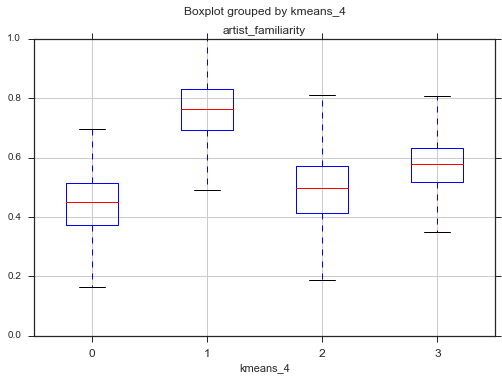

In [111]:
bp_artist_fami = mss_df_nu.boxplot(column='artist_familiarity',by='kmeans_4')

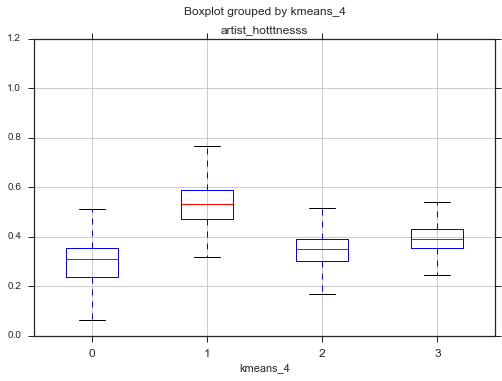

In [112]:
bp_artist_hott = mss_df_nu.boxplot(column='artist_hotttnesss',by='kmeans_4')

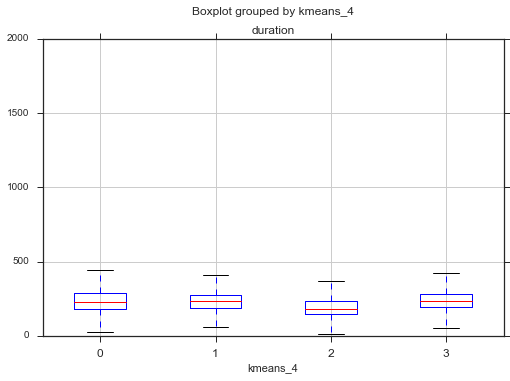

In [113]:
bp_duration = mss_df_nu.boxplot(column='duration',by='kmeans_4')

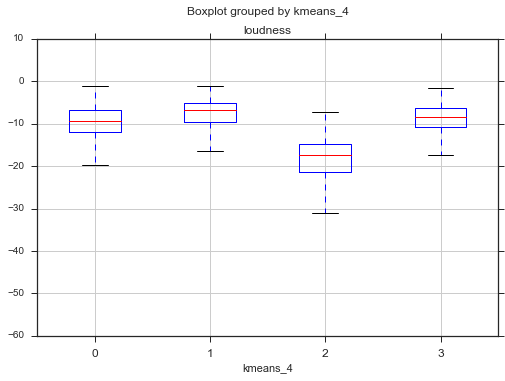

In [116]:
bp_loudness = mss_df_nu.boxplot(column='loudness',by='kmeans_4')

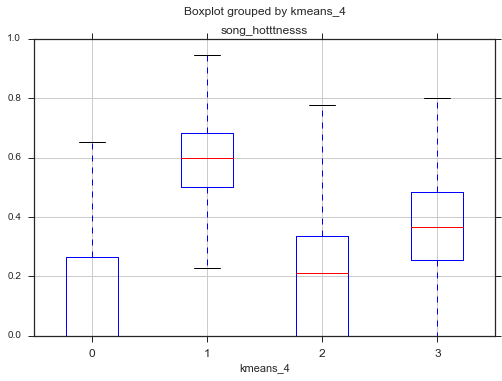

In [117]:
bp_song_hot = mss_df_nu.boxplot(column='song_hotttnesss',by='kmeans_4')

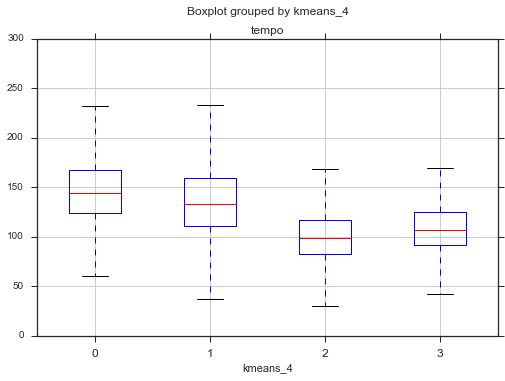

In [118]:
bp_tempo = mss_df_nu.boxplot(column='tempo',by='kmeans_4')

--End--